In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 1327 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1045s 25s/step - accuracy: 0.6179 - loss: 1.6444 - val_accuracy: 0.6719 - val_loss: 1.3629
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 449ms/step - accuracy: 0.7812 - loss: 1.2160 - val_accuracy: 0.7143 - val_loss: 1.2506
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1051s 25s/step - accuracy: 0.7410 - loss: 1.2475 - val_accuracy: 0.7135 - val_loss: 1.1353
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 29s 460ms/step - accuracy: 0.9333 - loss: 0.9370 - val_accuracy: 0.8571 - val_loss: 1.0135
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1011s 25s/step - accuracy: 0.8083 - loss: 1.0620 - val_accuracy: 0.7812 - val_loss: 0.9991
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 1.0000 - loss: 0.7886 - val_accuracy: 0.7857 - val_loss: 1.0260
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1012s 25s/step - accuracy: 0.8334 - loss: 0.9624 - val_accuracy: 0.8281 - val_loss: 0.9310
Epoch 8/15
41/

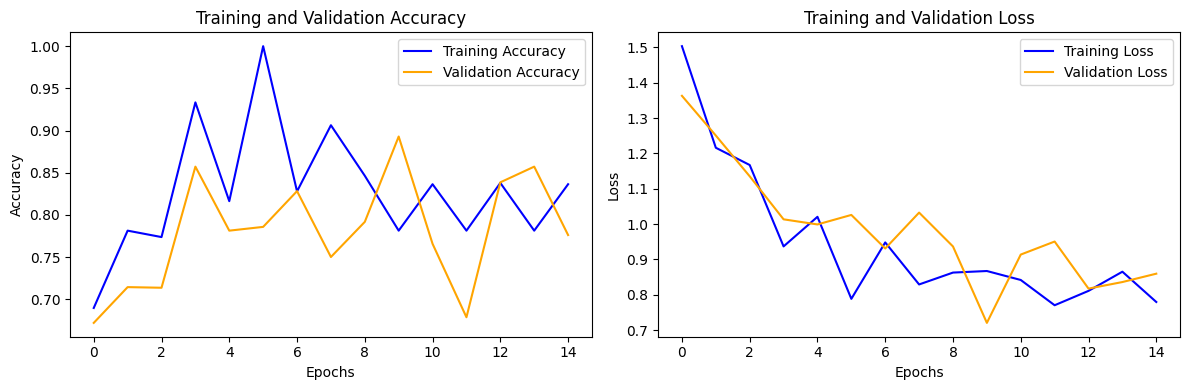

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths for your train and test directories
train_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST'

# Image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers to avoid changing the pre-trained weights
vgg_base.trainable = False

# Build the model by adding custom layers on top of the frozen VGG16 base
model = models.Sequential([
    vgg_base,
    layers.Flatten(),

    # Fully connected layer with L2 regularization and dropout to avoid overfitting
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer and a low learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with the training data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,  # You can increase this if the model is not overfitting
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Save the trained model
model.save('/content/drive/MyDrive/fake_logo_vgg16_regularized.h5')

# Plot training & validation accuracy/loss
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the accuracy and loss curves
plot_accuracy_loss(history)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# Function to build the model architecture (matching the original model)
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Try loading the trained model
try:
    model = load_model('/content/drive/MyDrive/fake_logo_vgg16_regularized.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    # If model loading fails, rebuild the model and load weights manually
    model = build_model()
    try:
        model.load_weights('/content/drive/MyDrive/fake_logo_vgg16_weights_only.h5')  # Provide a correct path
    except FileNotFoundError as fnf_error:
        print(f"File not found: {fnf_error}")
        # Ensure the correct path to the weights file or save the model weights if missing
    except Exception as other_error:
        print(f"Other error: {other_error}")

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Load the image with target size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

# Function to make predictions for a single image
def predict_single_image(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_array)  # Get the model prediction
    predicted_class = 'Genuine' if prediction[0][0] > 0.5 else 'Fake'  # Determine class
    return predicted_class, prediction[0][0]  # Return class and probability

# Function to predict and display results for multiple images in a directory
def predict_multiple_images(directory):
    # Loop through all images in the directory
    for img_file in os.listdir(directory):
        img_path = os.path.join(directory, img_file)
        predicted_class, probability = predict_single_image(img_path)

        # Display results
        print(f"Image: {img_file} | Predicted Class: {predicted_class}, Probability: {probability:.2f}")

        # Display the image and prediction
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prediction: {predicted_class} ({probability:.2f})")
        plt.show()

# Example usage for predicting a single image
img_path = '/content/drive/MyDrive/image/netflx.jpg'  # Replace with the path to your test image
predicted_class, probability = predict_single_image(img_path)
print(f"Predicted Class: {predicted_class}, Probability: {probability:.2f}")

# Example usage for predicting multiple images from a directory
# Uncomment the following line to predict multiple images:
# predict_multiple_images('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE')


Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_813>'],)
  • kwargs=<class 'inspect._empty'>
File not found: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/fake_logo_vgg16_weights_only.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted Class: Genuine, Probability: 0.50


FINAL MODEL

In [ ]:
# Import necessary libraries and modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths for your train and test directories
train_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST'

# Image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers to avoid changing the pre-trained weights
vgg_base.trainable = False

# Build the model
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),  # Add batch normalization
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a low learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_regularized.h5')

Found 1327 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1056s 25s/step - accuracy: 0.6245 - loss: 1.7278 - val_accuracy: 0.5104 - val_loss: 2.3937 - learning_rate: 1.0000e-04
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 13:14 20s/step - accuracy: 0.7812 - loss: 1.3171

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 440ms/step - accuracy: 0.7812 - loss: 1.3171 - val_accuracy: 0.4286 - val_loss: 2.8277 - learning_rate: 1.0000e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1003s 24s/step - accuracy: 0.7731 - loss: 1.3238 - val_accuracy: 0.5104 - val_loss: 2.4080 - learning_rate: 1.0000e-04
Epoch 4/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 14:36 22s/step - accuracy: 0.8750 - loss: 1.1036
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 495ms/step - accuracy: 0.8750 - loss: 1.1036 - val_accuracy: 0.4643 - val_loss: 2.4251 - learning_rate: 1.0000e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 987s 24s/step - accuracy: 0.8229 - loss: 1.1555 - val_accuracy: 0.5208 - val_loss: 1.9421 - learning_rate: 5.0000e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 465ms/step - accuracy: 0.7500 - loss: 1.3431 - val_accuracy: 0.5714 - val_loss: 1.7149 - learning_rate: 5.0000e-05
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1002s 24s/step - accuracy: 0.8280 - l

Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_587>'],)
  • kwargs=<class 'inspect._empty'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Fake


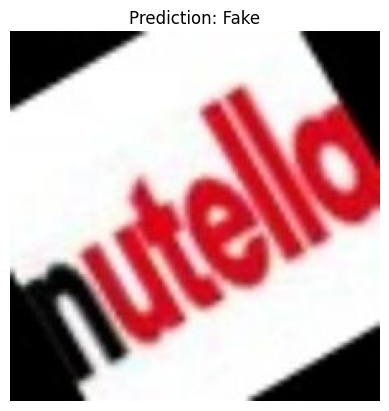

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to build the model architecture (matching the original model)
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Try loading the trained model
try:
    model = load_model('/content/drive/MyDrive/fake_logodetection_vgg16_regularized.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    # If model loading fails, rebuild the model and load weights manually
    model = build_model()
    # If you have separate weights to load, uncomment below
    # model.load_weights('/path/to/weights.h5')  # Provide the correct path to the weights if needed

# Function to preprocess the image (matching the training input shape)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(512, 512))  # Change target size to 512x512
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

# Function to make predictions for a single image
def predict_single_image(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_array)  # Get the model prediction
    predicted_class = 'Genuine' if prediction[0][0] > 0.5 else 'Fake'  # Determine class
    return predicted_class  # Return only the class

# Example usage for predicting a single image
img_path = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE/000001_27cd8a0167c342a9874c020bb5af9588.jpg'  # Replace with the path to your test image
predicted_class = predict_single_image(img_path)
print(f"Predicted Class: {predicted_class}")

# Display the image with its prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


Found 1327 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 934s 22s/step - accuracy: 0.6179 - loss: 2.7578 - val_accuracy: 0.6771 - val_loss: 2.1796 - learning_rate: 1.0000e-04
Epoch 2/15
 1/41 ━━━━━━━━━━━━━━━━━━━━ 11:56 18s/step - accuracy: 0.6875 - loss: 2.1548

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 396ms/step - accuracy: 0.6875 - loss: 2.1548 - val_accuracy: 0.5714 - val_loss: 2.2250 - learning_rate: 1.0000e-04
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 880s 21s/step - accuracy: 0.7745 - loss: 2.1428 - val_accuracy: 0.5833 - val_loss: 2.2315 - learning_rate: 1.0000e-04
Epoch 4/15
 1/41 ━━━━━━━━━━━━━━━━━━━━ 12:43 19s/step - accuracy: 0.7188 - loss: 2.4918
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 416ms/step - accuracy: 0.7188 - loss: 2.4918 - val_accuracy: 0.5714 - val_loss: 2.4113 - learning_rate: 1.0000e-04


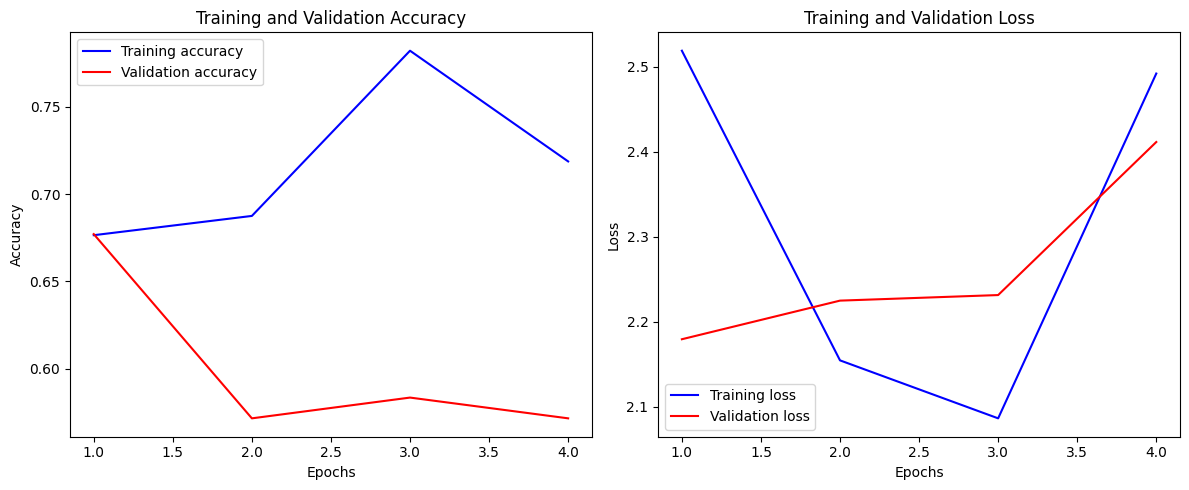

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1025s 25s/step - accuracy: 0.7666 - loss: 2.1664 - val_accuracy: 0.7396 - val_loss: 2.0597 - learning_rate: 1.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7500 - loss: 2.1588 - val_accuracy: 0.5000 - val_loss: 2.2973 - learning_rate: 1.0000e-05
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1054s 24s/step - accuracy: 0.7814 - loss: 2.0915 - val_accuracy: 0.7604 - val_loss: 2.0010 - learning_rate: 1.0000e-05
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 392ms/step - accuracy: 0.7188 - loss: 2.0603 - val_accuracy: 0.8214 - val_loss: 1.9086 - learning_rate: 1.0000e-05
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 999s 24s/step - accuracy: 0.8025 - loss: 1.9203 - val_accuracy: 0.8281 - val_loss: 1.8999 - learning_rate: 1.0000e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7500 - loss: 1.9163 - val_accuracy: 0.8929 - val_loss: 1.8744 - learning_rate: 1.0000e-05
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 986s 24s/step - accuracy: 0

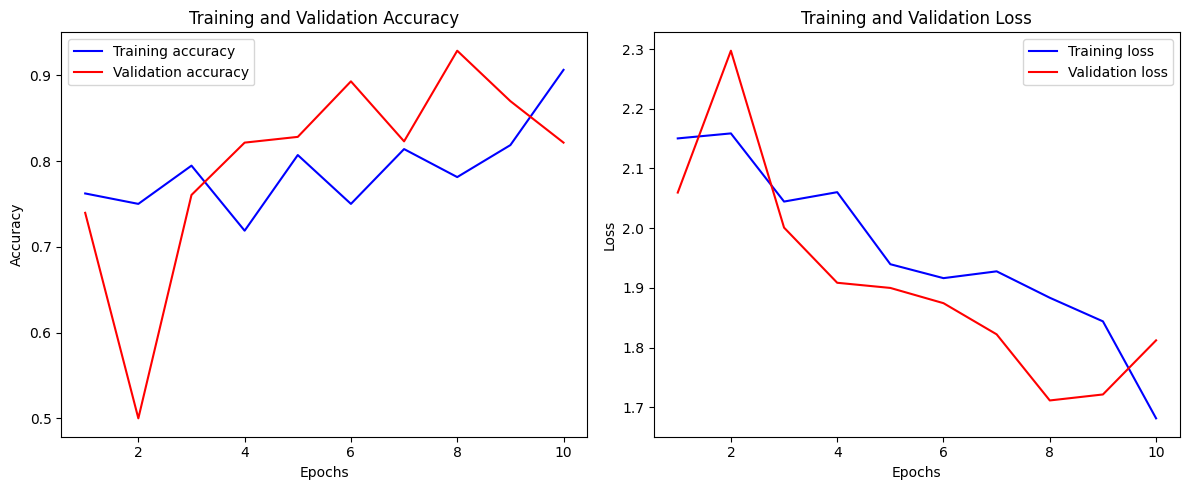

In [ ]:
# Import necessary libraries and modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths for your train and test directories
train_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST'

# Image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers to avoid changing the pre-trained weights
vgg_base.trainable = False

# Build the model with increased dropout and L2 regularization
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)),  # L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.6),  # Dropout rate 0.6
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a low learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,  # Increased number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the trained model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_regularized_v2.h5')

# Plotting training and validation accuracy/loss curves
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Optionally, fine-tune some VGG16 layers for better generalization
vgg_base.trainable = True

# Freeze all layers except the last 4
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Compile the model again after unfreezing some layers for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Fine-tuning for fewer epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the fine-tuned model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned.h5')

# Plot the fine-tuning training history
plot_training_history(history_fine)


Found 1327 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 980s 24s/step - accuracy: 0.6456 - loss: 2.6825 - val_accuracy: 0.5104 - val_loss: 2.8444 - learning_rate: 1.0000e-04
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 13:12 20s/step - accuracy: 0.8438 - loss: 1.9450

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8438 - loss: 1.9450 - val_accuracy: 0.5000 - val_loss: 2.7758 - learning_rate: 1.0000e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 977s 24s/step - accuracy: 0.7640 - loss: 2.1738 - val_accuracy: 0.5469 - val_loss: 2.4005 - learning_rate: 1.0000e-04
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 440ms/step - accuracy: 0.9062 - loss: 1.7152 - val_accuracy: 0.6429 - val_loss: 2.0765 - learning_rate: 1.0000e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 998s 24s/step - accuracy: 0.7832 - loss: 1.9145 - val_accuracy: 0.6875 - val_loss: 2.0169 - learning_rate: 1.0000e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7500 - loss: 1.9027 - val_accuracy: 0.6071 - val_loss: 2.2189 - learning_rate: 1.0000e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1029s 24s/step - accuracy: 0.8093 - loss: 1.8288 - val_accuracy: 0.6302 - val_loss: 2.1860 - learning_rate: 1.0000e-04
Epoch 8/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 13:11 20s/step - accuracy: 0.8438 - los

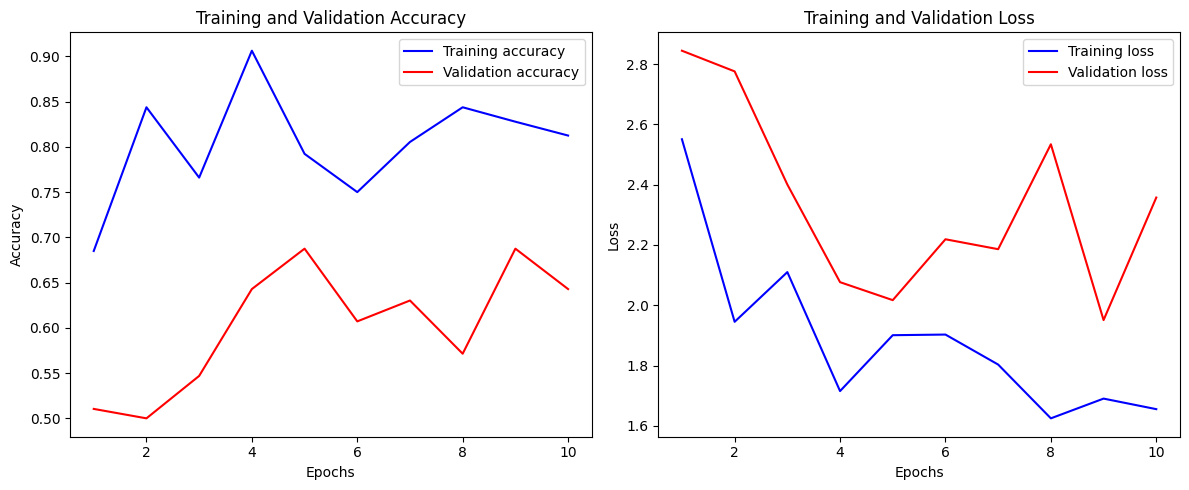

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1141s 28s/step - accuracy: 0.8458 - loss: 1.6537 - val_accuracy: 0.7083 - val_loss: 1.9185 - learning_rate: 1.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8438 - loss: 1.6787 - val_accuracy: 0.8929 - val_loss: 1.5572 - learning_rate: 1.0000e-05
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1132s 28s/step - accuracy: 0.8368 - loss: 1.6008 - val_accuracy: 0.8385 - val_loss: 1.5538 - learning_rate: 1.0000e-05
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 428ms/step - accuracy: 0.8750 - loss: 1.4260 - val_accuracy: 0.8214 - val_loss: 1.5361 - learning_rate: 1.0000e-05
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1176s 27s/step - accuracy: 0.8526 - loss: 1.5385 - val_accuracy: 0.8125 - val_loss: 1.5962 - learning_rate: 1.0000e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 438ms/step - accuracy: 0.8125 - loss: 1.4899 - val_accuracy: 0.8571 - val_loss: 1.4872 - learning_rate: 1.0000e-05
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1179s 27s/step - accura

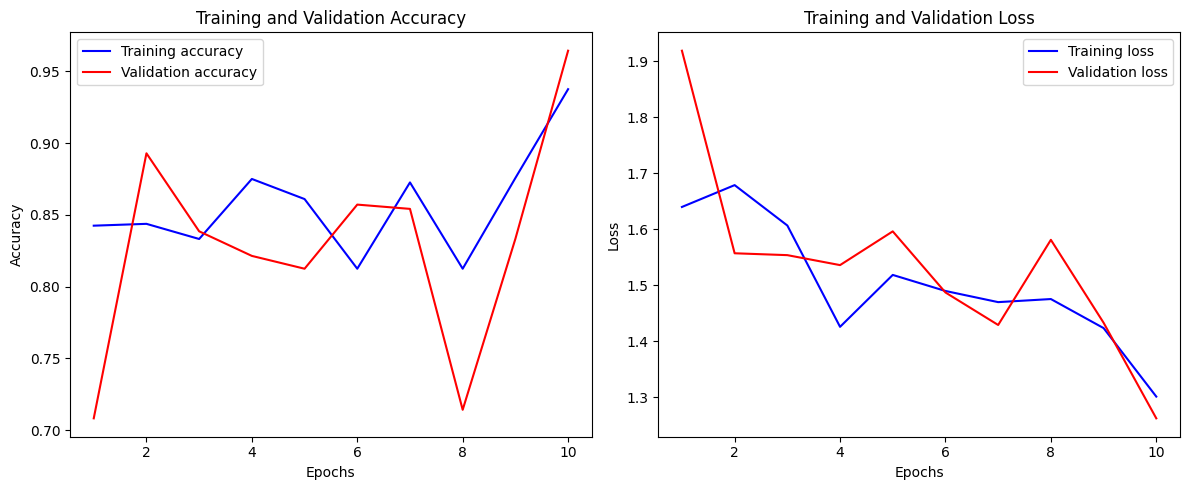

7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 20s/step - accuracy: 0.8643 - loss: 1.3901
Test accuracy: 0.8500, Test loss: 1.4073


In [ ]:
# Import necessary libraries and modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths for your train and test directories
train_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST'

# Image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers to avoid changing the pre-trained weights
vgg_base.trainable = False

# Build the model with increased dropout and L2 regularization
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)),  # L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout rate to avoid overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a low learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Increased number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the trained model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_regularized_best.h5')

# Plotting training and validation accuracy/loss curves
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Fine-tuning: Unfreeze the top 4 layers of VGG16 for fine-tuning
vgg_base.trainable = True

# Freeze all layers except the last 4
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Compile the model again after unfreezing some layers for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Fine-tuning for fewer epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the fine-tuned model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned_best.h5')

# Plot the fine-tuning training history
plot_training_history(history_fine)

# Evaluate the model on unseen test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')


model

Found 1327 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 988s 24s/step - accuracy: 0.6144 - loss: 3.7909 - val_accuracy: 0.4896 - val_loss: 3.5632 - learning_rate: 5.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5312 - loss: 3.5100 - val_accuracy: 0.6429 - val_loss: 3.3479 - learning_rate: 5.0000e-05
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1025s 24s/step - accuracy: 0.7314 - loss: 3.2386 - val_accuracy: 0.5938 - val_loss: 3.1235 - learning_rate: 5.0000e-05
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 446ms/step - accuracy: 0.8438 - loss: 2.9482 - val_accuracy: 0.5714 - val_loss: 3.0682 - learning_rate: 5.0000e-05
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1010s 24s/step - accuracy: 0.7454 - loss: 3.0166 - val_accuracy: 0.7083 - val_loss: 2.8816 - learning_rate: 5.0000e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 439ms/step - accuracy: 0.8125 - loss: 2.8054 - val_accuracy: 0.7143 - val_loss: 2.8247 - learn

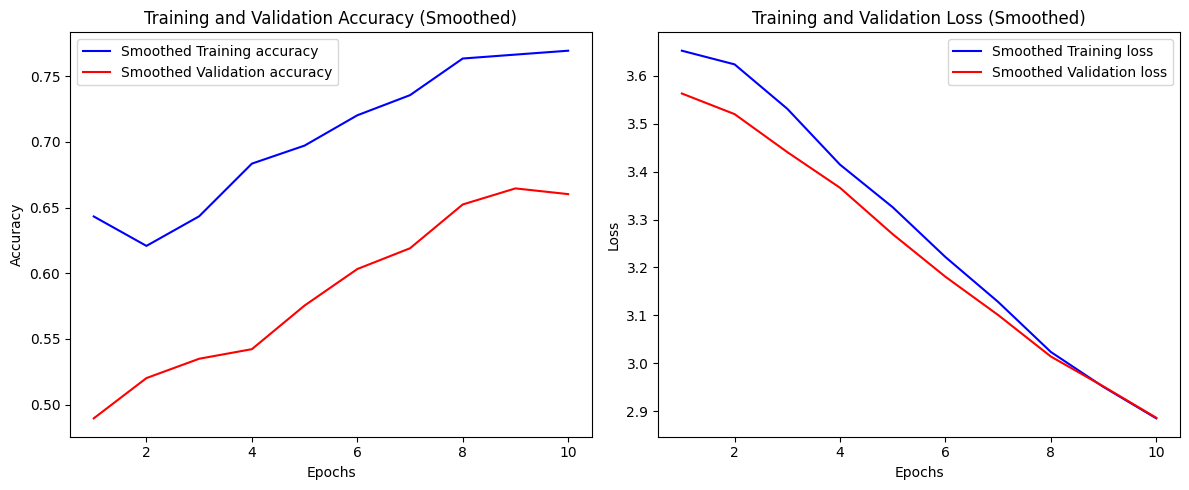

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1157s 28s/step - accuracy: 0.8182 - loss: 2.5099 - val_accuracy: 0.6979 - val_loss: 2.6330 - learning_rate: 1.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.8438 - loss: 2.4274 - val_accuracy: 0.7857 - val_loss: 2.6023 - learning_rate: 1.0000e-05
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1170s 28s/step - accuracy: 0.7908 - loss: 2.4969 - val_accuracy: 0.7292 - val_loss: 2.5570 - learning_rate: 1.0000e-05
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 476ms/step - accuracy: 0.7812 - loss: 2.6453 - val_accuracy: 0.7857 - val_loss: 2.4373 - learning_rate: 1.0000e-05
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1183s 28s/step - accuracy: 0.8505 - loss: 2.3403 - val_accuracy: 0.8125 - val_loss: 2.3217 - learning_rate: 1.0000e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.8438 - loss: 2.2732 - val_accuracy: 0.8571 - val_loss: 2.2931 - learning_rate: 1.0000e-05
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1176s 28s/step - acc

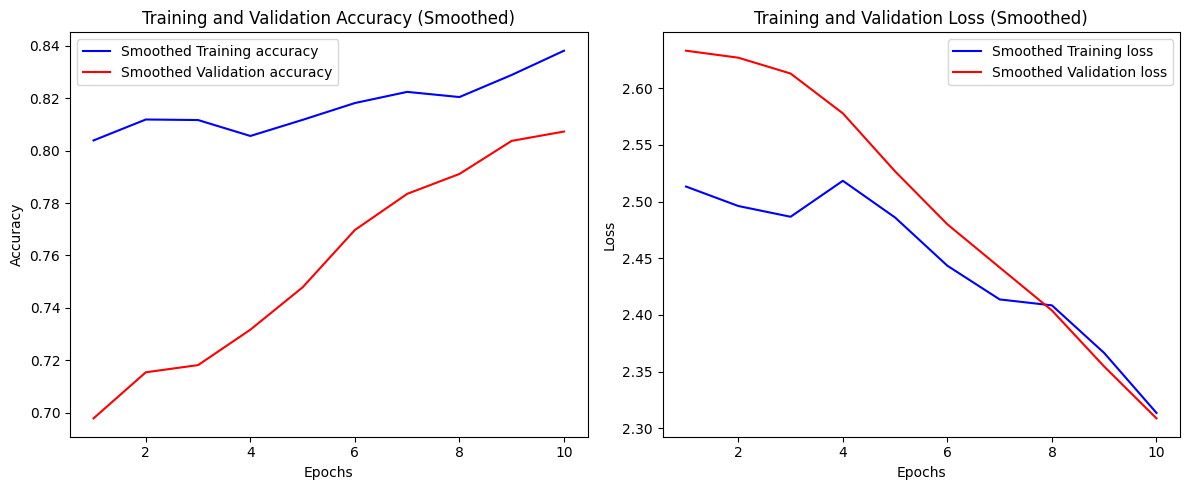

7/7 ━━━━━━━━━━━━━━━━━━━━ 150s 20s/step - accuracy: 0.8589 - loss: 2.1413
Test accuracy: 0.8591, Test loss: 2.1476


In [ ]:
# Import necessary libraries and modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths for your train and test directories
train_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST'

# Image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers to avoid changing the pre-trained weights
vgg_base.trainable = False

# Build the model with increased dropout and L2 regularization
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.003)),  # More L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.6),  # Increased dropout rate to 60%
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a low learning rate
model.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lowered learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1)  # Reduce LR by 70%

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Increased number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the trained model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_regularized_best_improved.h5')

# Function to smooth the curve
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Updated plot function with smoothing
def plot_training_history_smooth(history, smoothing_factor=0.8):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Smooth the curves
    acc_smooth = smooth_curve(acc, smoothing_factor)
    val_acc_smooth = smooth_curve(val_acc, smoothing_factor)
    loss_smooth = smooth_curve(loss, smoothing_factor)
    val_loss_smooth = smooth_curve(val_loss, smoothing_factor)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc_smooth, 'b', label='Smoothed Training accuracy')
    plt.plot(epochs, val_acc_smooth, 'r', label='Smoothed Validation accuracy')
    plt.title('Training and Validation Accuracy (Smoothed)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_smooth, 'b', label='Smoothed Training loss')
    plt.plot(epochs, val_loss_smooth, 'r', label='Smoothed Validation loss')
    plt.title('Training and Validation Loss (Smoothed)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function to plot smoothed curves
plot_training_history_smooth(history)

# Fine-tuning: Unfreeze the top 4 layers of VGG16 for fine-tuning
vgg_base.trainable = True

# Freeze all layers except the last 4
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Compile the model again after unfreezing some layers for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Fine-tuning for fewer epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

# Save the fine-tuned model
model.save('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned_best_improved.h5')

# Plot the fine-tuning training history
plot_training_history_smooth(history_fine)

# Evaluate the model on unseen test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')


Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_187>'],)
  • kwargs=<class 'inspect._empty'>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Class: Genuine


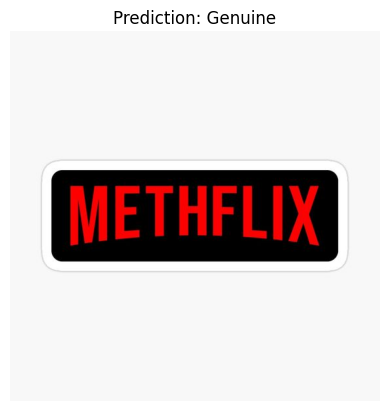

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to build the model architecture (matching the original model)
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Try loading the trained model
try:
    model = load_model('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned_best_improved.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    # If model loading fails, rebuild the model and load weights manually
    model = build_model()
    # If you have separate weights to load, uncomment below
    # model.load_weights('/path/to/weights.h5')  # Provide the correct path to the weights if needed

# Function to preprocess the image (matching the training input shape)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Change target size to 512x512
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

# Function to make predictions for a single image
def predict_single_image(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_array)  # Get the model prediction
    predicted_class = 'Genuine' if prediction[0][0] > 0.5 else 'Fake'  # Determine class
    return predicted_class  # Return only the class

# Example usage for predicting a single image
img_path = '/content/drive/MyDrive/image/metflix.jpg'  # Replace with the path to your test image
predicted_class = predict_single_image(img_path)
print(f"Predicted Class: {predicted_class}")

# Display the image with its prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_37>'],)
  • kwargs=<class 'inspect._empty'>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
Predicted Class: Fake


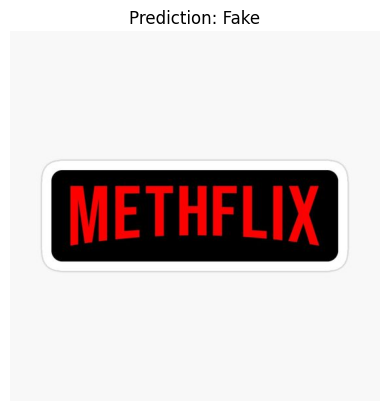

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to build the model architecture (matching the original model)
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Try loading the trained model
try:
    model = load_model('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned_best_improved.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    # If model loading fails, rebuild the model and load weights manually
    model = build_model()
    # If you have separate weights to load, uncomment below
    # model.load_weights('/path/to/weights.h5')  # Provide the correct path to the weights if needed

# Function to preprocess the image (matching the training input shape)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(512, 512))  # Change target size to 512x512
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

# Function to make predictions for a single image
def predict_single_image(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_array)  # Get the model prediction
    predicted_class = 'Genuine' if prediction[0][0] > 0.5 else 'Fake'  # Determine class
    return predicted_class  # Return only the class

# Example usage for predicting a single image
img_path = '/content/drive/MyDrive/image/metflix.jpg'  # Replace with the path to your test image
predicted_class = predict_single_image(img_path)
print(f"Predicted Class: {predicted_class}")

# Display the image with its prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


In [ ]:
pip install seaborn


Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_1793>'],)
  • kwargs=<class 'inspect._empty'>
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 155s 21s/step


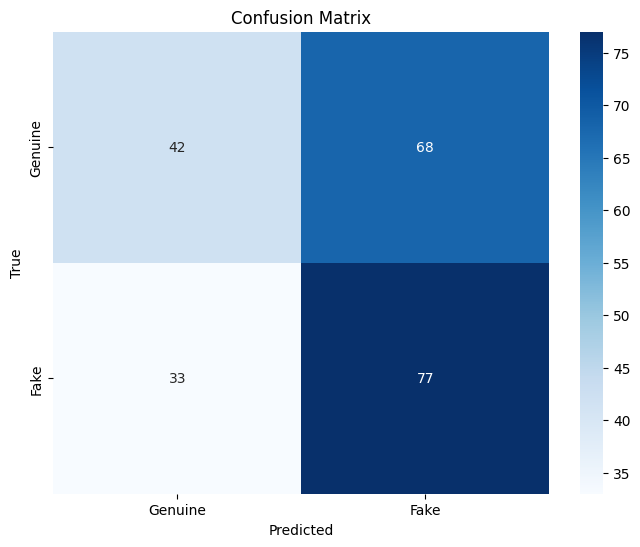

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
def build_model():
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Match the input shape
    vgg_base.trainable = False

    # Build the model with increased dropout and L2 regularization
    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
        layers.BatchNormalization(),
        layers.Dropout(0.6),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Try loading the trained model
try:
    model = load_model('/content/drive/MyDrive/fake_logodetection_vgg16_finetuned_best_improved.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    # If model loading fails, rebuild the model and load weights manually
    model = build_model()  # Call build_model to create the model with correct input shape

# Step 1: Make predictions on the test data
# Use the test generator to make predictions
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Step 2: Get true classes
true_classes = test_generator.classes  # True labels from the generator

# Step 3: Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


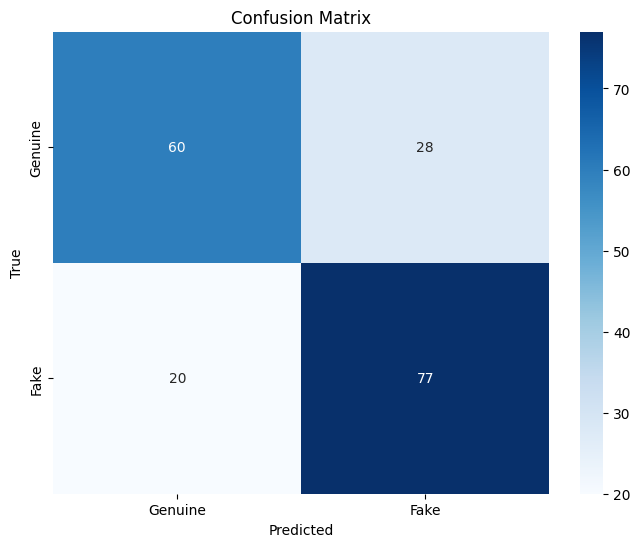

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data (replace with your own values)
cm = np.array([[60, 28], [20, 77]])

# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels and title
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Genuine", "Fake"])
ax.yaxis.set_ticklabels(["Genuine", "Fake"])

plt.show()